In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_excel("D:\Reserch files\MAMUN SIR new project\Book1.xlsx")

In [3]:
df.drop('Name',axis=1,inplace=True)

Drop the Object Columns (Name Column Delted) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HTN          1501 non-null   int64 
 1   DM           1501 non-null   int64 
 2   SMK          1501 non-null   int64 
 3   DL           1501 non-null   int64 
 4   FH           1501 non-null   int64 
 5   AMI          1501 non-null   int64 
 6   Sex          1501 non-null   int64 
 7   NSTEMI       1501 non-null   int64 
 8   SA           1501 non-null   int64 
 9   UA           1501 non-null   int64 
 10  HOCABG       1501 non-null   int64 
 11  HOPCI        1501 non-null   int64 
 12  Age_Group    1501 non-null   int64 
 13  LDL1         1501 non-null   object
 14  HDL1         1501 non-null   object
 15  TG1          1501 non-null   object
 16  EF1          1501 non-null   object
 17  Indication1  1501 non-null   int64 
 18  TC1          1501 non-null   object
dtypes: int64(14), object(5)
mem

In [5]:
#Convert the Object Variable to Int 
columns_to_convert = ['LDL1', 'HDL1', 'TG1', 'EF1','TC1']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HTN          1501 non-null   int64  
 1   DM           1501 non-null   int64  
 2   SMK          1501 non-null   int64  
 3   DL           1501 non-null   int64  
 4   FH           1501 non-null   int64  
 5   AMI          1501 non-null   int64  
 6   Sex          1501 non-null   int64  
 7   NSTEMI       1501 non-null   int64  
 8   SA           1501 non-null   int64  
 9   UA           1501 non-null   int64  
 10  HOCABG       1501 non-null   int64  
 11  HOPCI        1501 non-null   int64  
 12  Age_Group    1501 non-null   int64  
 13  LDL1         1434 non-null   float64
 14  HDL1         1434 non-null   float64
 15  TG1          1434 non-null   float64
 16  EF1          1405 non-null   float64
 17  Indication1  1501 non-null   int64  
 18  TC1          1434 non-null   float64
dtypes: flo

In [7]:
df['HDL1']=pd.to_numeric(df['HDL1'], errors='coerce').convert_dtypes() 
df['LDL1']=pd.to_numeric(df['LDL1'], errors='coerce').convert_dtypes() 
df['TG1']=pd.to_numeric(df['TG1'], errors='coerce').convert_dtypes() 
df['EF1']=pd.to_numeric(df['EF1'], errors='coerce').convert_dtypes()
df['TC1']=pd.to_numeric(df['TC1'], errors='coerce').convert_dtypes() 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1501 non-null   int64
 1   DM           1501 non-null   int64
 2   SMK          1501 non-null   int64
 3   DL           1501 non-null   int64
 4   FH           1501 non-null   int64
 5   AMI          1501 non-null   int64
 6   Sex          1501 non-null   int64
 7   NSTEMI       1501 non-null   int64
 8   SA           1501 non-null   int64
 9   UA           1501 non-null   int64
 10  HOCABG       1501 non-null   int64
 11  HOPCI        1501 non-null   int64
 12  Age_Group    1501 non-null   int64
 13  LDL1         1434 non-null   Int64
 14  HDL1         1434 non-null   Int64
 15  TG1          1434 non-null   Int64
 16  EF1          1405 non-null   Int64
 17  Indication1  1501 non-null   int64
 18  TC1          1434 non-null   Int64
dtypes: Int64(5), int64(14)
memory usage: 230.3 KB


# Handel the Missing Values and Outliers  

In [9]:
df.isnull().sum()

HTN             0
DM              0
SMK             0
DL              0
FH              0
AMI             0
Sex             0
NSTEMI          0
SA              0
UA              0
HOCABG          0
HOPCI           0
Age_Group       0
LDL1           67
HDL1           67
TG1            67
EF1            96
Indication1     0
TC1            67
dtype: int64

In [10]:
for col in ['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

In [11]:
df.isnull().sum()

HTN            0
DM             0
SMK            0
DL             0
FH             0
AMI            0
Sex            0
NSTEMI         0
SA             0
UA             0
HOCABG         0
HOPCI          0
Age_Group      0
LDL1           0
HDL1           0
TG1            0
EF1            0
Indication1    0
TC1            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('AMI', axis=1)
y = df['AMI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking Multicolinearity 

<Axes: >

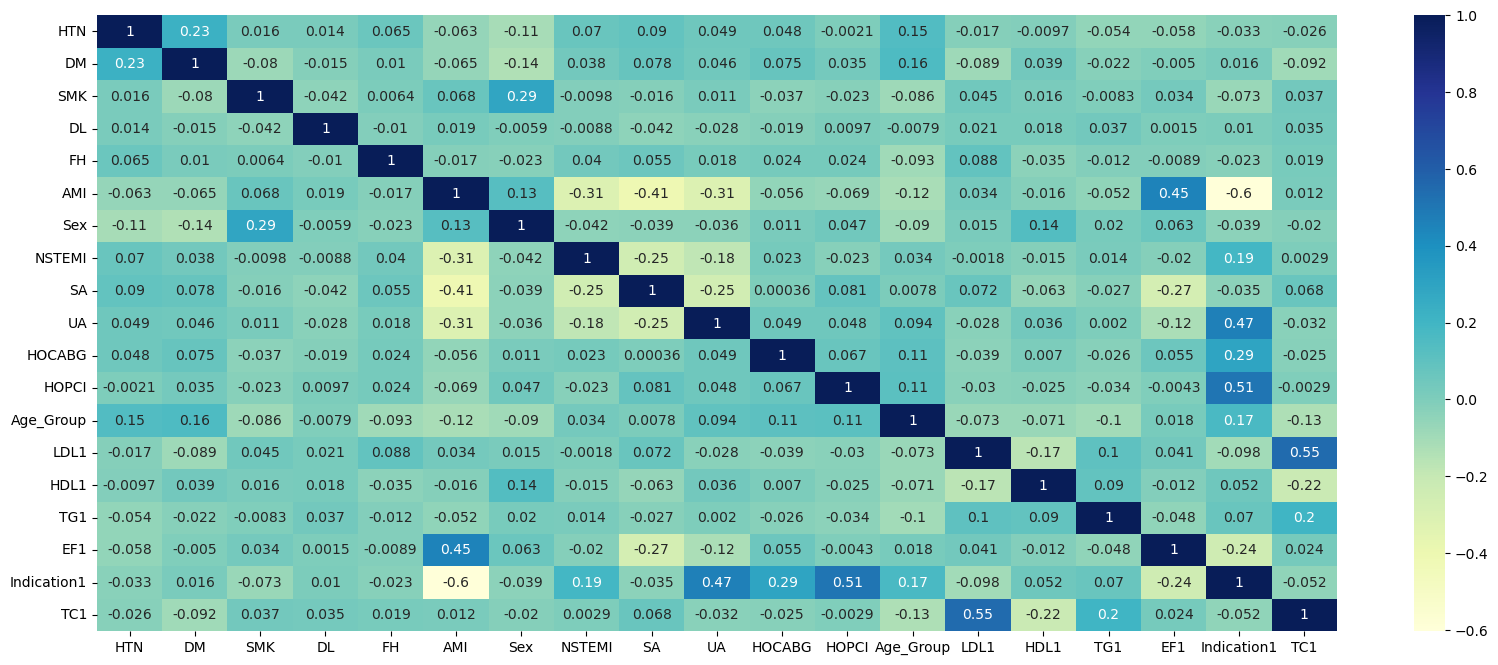

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Assumtions of Linear Relationship .ipynb

In [30]:
df.describe()

,HTN,DM,SMK,DL,FH,target,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.0,1501.0,1501.0,1501.0,1501.000000,1501.0
mean,0.669554,0.475017,0.404397,0.009993,0.381746,0.373751,1.885410,0.165889,0.249167,0.171219,0.034644,0.103931,1.711526,1.427715,1.792805,1.5503,1.326449,2.645570,1.313125
std,0.470531,0.499542,0.490939,0.099499,0.485977,0.483960,0.318633,0.372105,0.432675,0.376826,0.182936,0.305272,0.569263,0.494912,0.405432,0.497629,0.46907,1.513372,0.629726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,2.0,1.0,1.0,1.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,2.0,2.0,1.0,2.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.0,2.0,2.0,2.0,4.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.0,2.0,2.0,2.0,5.000000,3.0


In [28]:
df.rename(columns={'Target':'target'},inplace=True)
df.columns

Index(['HTN', 'DM', 'SMK', 'DL', 'FH', 'target', 'Sex', 'NSTEMI', 'SA', 'UA',
       'HOCABG', 'HOPCI', 'Age_Group', 'LDL1', 'HDL1', 'TG1', 'EF1',
       'Indication1', 'TC1'],
      dtype='object')

# 1st Assumption : Linear Relationship between dependent and independent variables 

Text(0.5, 1.0, 'FH')

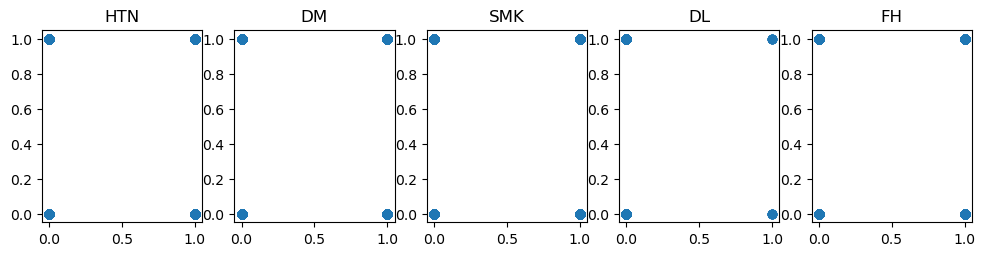

In [71]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(ncols=5, figsize=(12, 2.5))

ax1.scatter(df['HTN'], df['target'])
ax1.set_title("HTN")
ax2.scatter(df['DM'], df['target'])
ax2.set_title("DM")
ax3.scatter(df['SMK'], df['target'])
ax3.set_title("SMK")
ax4.scatter(df['DL'], df['target'])
ax4.set_title("DL")
ax5.scatter(df['FH'], df['target'])
ax5.set_title("FH")

In [61]:
class_0 , class_1 =  df['target'].value_counts()

<Axes: ylabel='target'>

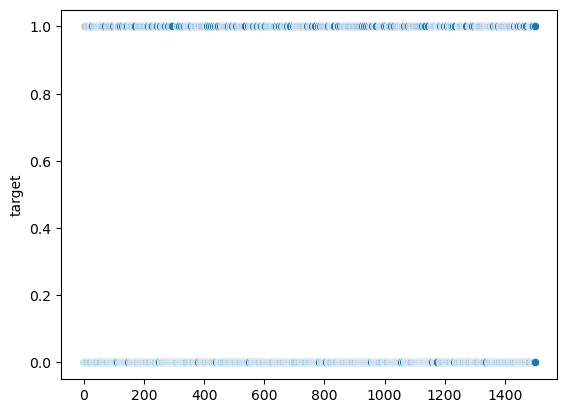

In [69]:
sns.scatterplot(df.target)

<Axes: xlabel='HTN', ylabel='target'>

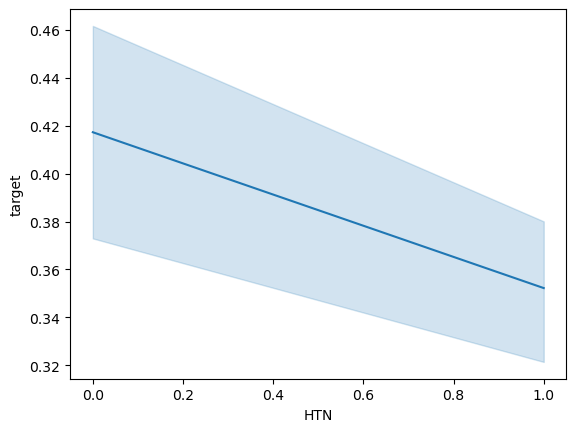

In [56]:
sns.lineplot(x=df['HTN'],y=df['target'],data=df)

<Axes: xlabel='DM', ylabel='target'>

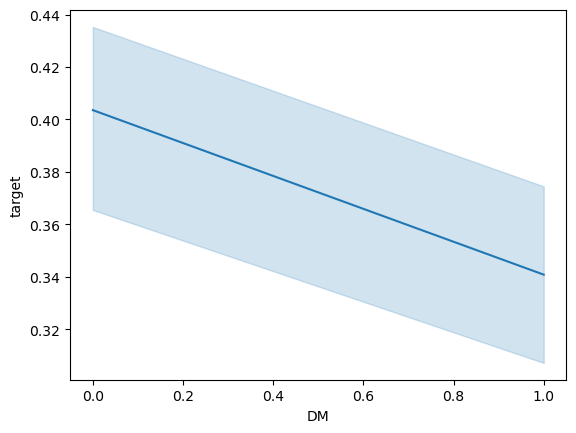

In [57]:
sns.lineplot(x=df['DM'],y=df['target'],data=df)

<Axes: xlabel='FH', ylabel='target'>

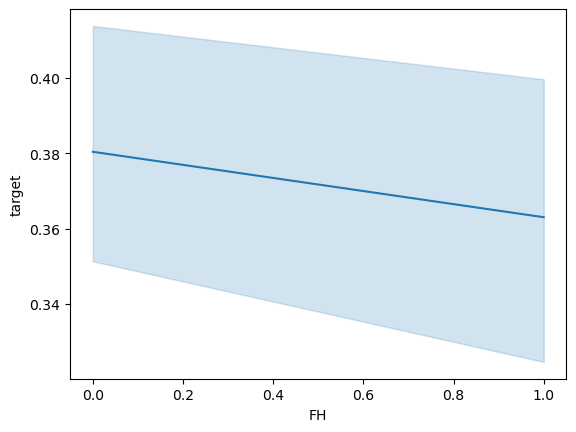

In [50]:
sns.lineplot(x=df['FH'],y=df['target'],data=df)

<Axes: xlabel='DM', ylabel='target'>

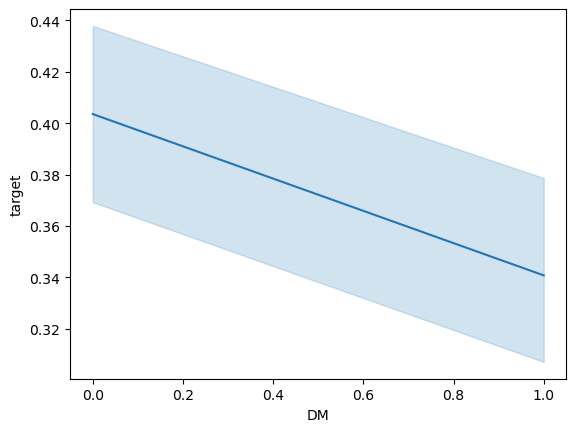

In [58]:
sns.lineplot(x=df['DM'],y=df['target'],data=df)

<Axes: xlabel='SMK', ylabel='target'>

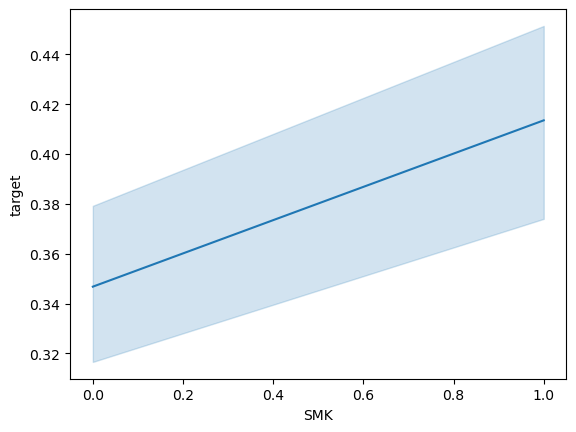

In [59]:

sns.lineplot(x=df['SMK'],y=df['target'],data=df)

<Axes: xlabel='Sex', ylabel='target'>

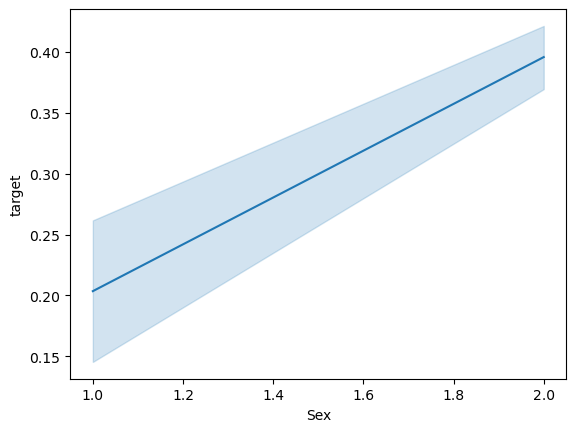

In [51]:
sns.lineplot(x=df['Sex'],y=df['target'],data=df)

<Axes: xlabel='NSTEMI', ylabel='target'>

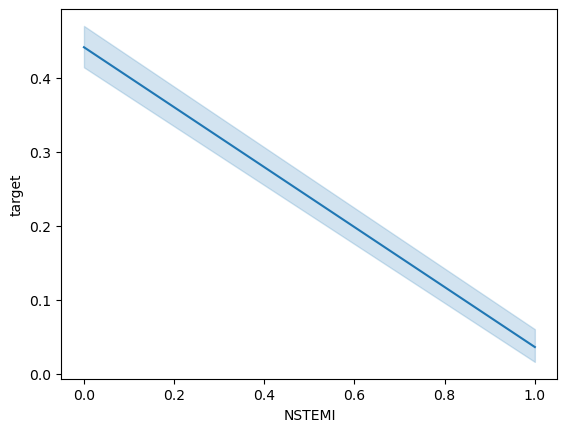

In [49]:
sns.lineplot(x=df['NSTEMI'],y=df['target'],data=df)

<Axes: xlabel='SA', ylabel='target'>

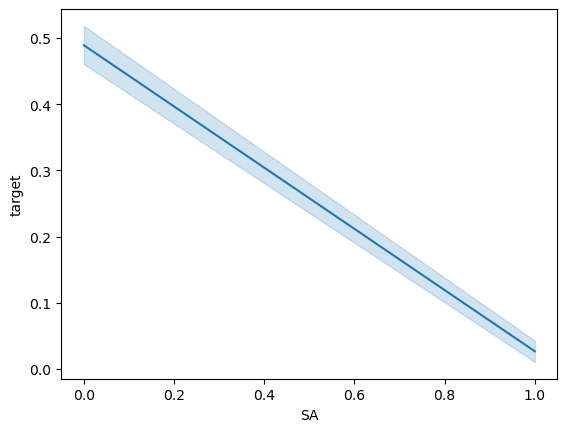

In [52]:
sns.lineplot(x=df['SA'],y=df['target'],data=df)


<Axes: xlabel='UA', ylabel='target'>

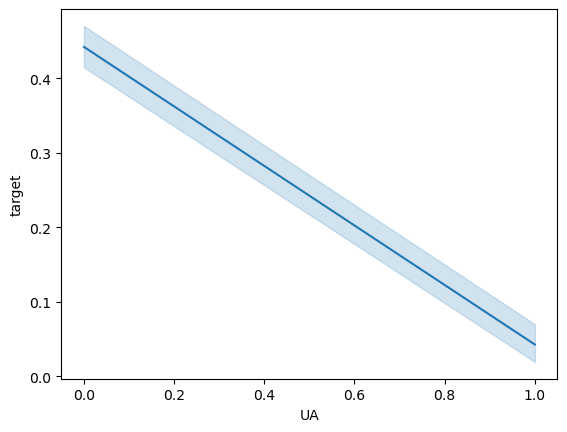

In [54]:
sns.lineplot(x=df['UA'],y=df['target'],data=df)

<Axes: xlabel='HOCABG', ylabel='target'>

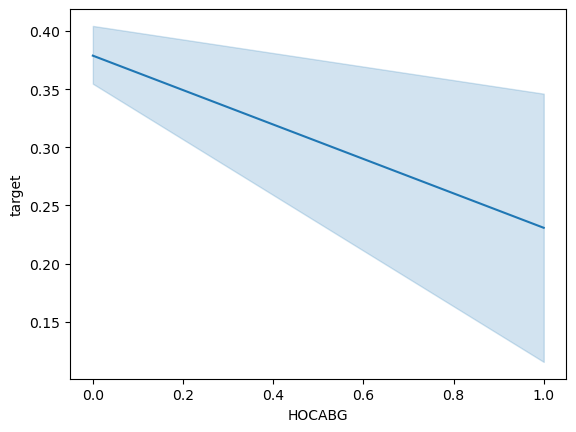

In [55]:
sns.lineplot(x=df['HOCABG'],y=df['target'],data=df)

# Using Standard Scaling 

In [ ]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

# Model insialization

In [77]:
df1=df.drop('target',axis=1)
df1.columns

Index(['HTN', 'DM', 'SMK', 'DL', 'FH', 'Sex', 'NSTEMI', 'SA', 'UA', 'HOCABG',
       'HOPCI', 'Age_Group', 'LDL1', 'HDL1', 'TG1', 'EF1', 'Indication1',
       'TC1'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df1
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 742 to 684
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1050 non-null   int64
 1   DM           1050 non-null   int64
 2   SMK          1050 non-null   int64
 3   DL           1050 non-null   int64
 4   FH           1050 non-null   int64
 5   Sex          1050 non-null   int64
 6   NSTEMI       1050 non-null   int64
 7   SA           1050 non-null   int64
 8   UA           1050 non-null   int64
 9   HOCABG       1050 non-null   int64
 10  HOPCI        1050 non-null   int64
 11  Age_Group    1050 non-null   int64
 12  LDL1         1050 non-null   Int64
 13  HDL1         1050 non-null   Int64
 14  TG1          1050 non-null   Int64
 15  EF1          1050 non-null   Int64
 16  Indication1  1050 non-null   int64
 17  TC1          1050 non-null   Int64
dtypes: Int64(5), int64(13)
memory usage: 161.0 KB


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=200,min_samples_leaf=100, max_depth=3)
dt.fit(X_train, y_train)
y_pred3 = dt.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred3).sum())
print(metrics.classification_report(y_test, y_pred3))
print (roc_auc_score(y_test, y_pred3))

Misclassified samples: 21
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       256
           1       1.00      0.89      0.94       195

    accuracy                           0.95       451
   macro avg       0.96      0.95      0.95       451
weighted avg       0.96      0.95      0.95       451

0.9461538461538461


In [84]:
from sklearn.tree import _tree

nn=0
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):" .format(", " .join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            table = 'X_train'
            name = table+"['"+feature_name[node]+"']"
            

            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            def increment():
                global nn
                nn=nn+1
            increment()
            print ("{}return 'Node_{}'".format(indent, nn))

    recurse(0, 1)

In [86]:
columns=X_train.columns

In [87]:
tree_to_code(dt,columns)


    if X_train['Indication1'] <= 1.5:
        return 'Node_1'
    else:  # if X_train['Indication1'] > 1.5
        if X_train['HOPCI'] <= 0.5:
            if X_train['EF1'] <= 1.5:
                return 'Node_2'
            else:  # if X_train['EF1'] > 1.5
                return 'Node_3'
        else:  # if X_train['HOPCI'] > 0.5
            return 'Node_4'


In [91]:
def tree(X_train):
    
    if X_train['Indication1'] <= 1.5:
        return 'Node_1'
    else:  # if X_train['Indication1'] > 1.5
        if X_train['HOPCI'] <= 0.5:
            if X_train['EF1'] <= 1.5:
                return 'Node_2'
            else:  # if X_train['EF1'] > 1.5
                return 'Node_3'
        else:  # if X_train['HOPCI'] > 0.5
            return 'Node_4'


In [93]:
df['nodes']=df.apply(tree, axis=1)
df_n= pd.get_dummies(df['nodes'],drop_first=True)
df_2=pd.concat([df, df_n], axis=1)
df_2=df_2.drop(['nodes'],axis=1)